In [11]:
import pandas as pd #завантаження бібліотеки Pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('CarEvaluation.csv')

In [7]:
df.head()  # Перші 5 рядків датафрейму


,buying,maint,persons,lug_boot,doors,safety,car
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,class
2,vhigh,vhigh,2,small,2,low,unacc
3,vhigh,vhigh,2,small,2,med,unacc
4,vhigh,vhigh,2,small,2,high,unacc


In [8]:
df.info()  # Інформація про типи даних та кількість значень
df.describe()  # Описова статистика

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1729 non-null   object
 1   maint     1729 non-null   object
 2   persons   1729 non-null   object
 3   lug_boot  1729 non-null   object
 4   doors     1729 non-null   object
 5   safety    1729 non-null   object
 6   car       1730 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


,buying,maint,persons,lug_boot,doors,safety,car
count,1729,1729,1729,1729,1729,1729,1730
unique,5,5,4,4,5,4,6
top,vhigh,vhigh,2,small,2,low,unacc
freq,432,432,576,576,432,576,1210


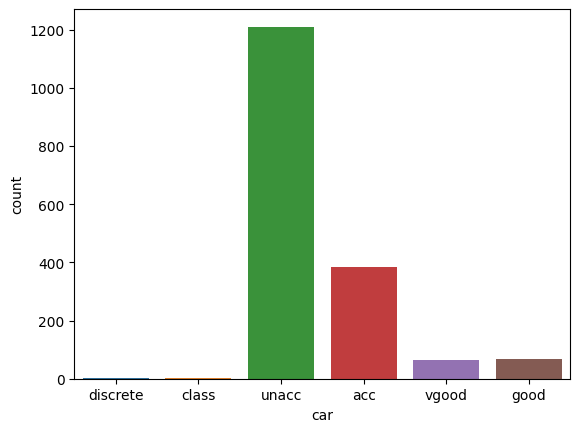

In [13]:
sns.countplot(x='car', data=df)  # Візуалізація категоріальних даних
plt.show()


In [19]:
df.shape #показує, скільки у датафреймі рядків та стовпчиків

(1730, 7)

In [20]:
df['buying'].value_counts()  # Підрахунок кількості записів для колонки "buying"
df['safety'].value_counts()  # Підрахунок кількості записів для колонки "safety"


low         576
med         576
high        576
discrete      1
Name: safety, dtype: int64

In [21]:
df.isnull().sum()  # Підрахунок кількості відсутніх значень в кожній колонці

buying      1
maint       1
persons     1
lug_boot    1
doors       1
safety      1
car         0
dtype: int64

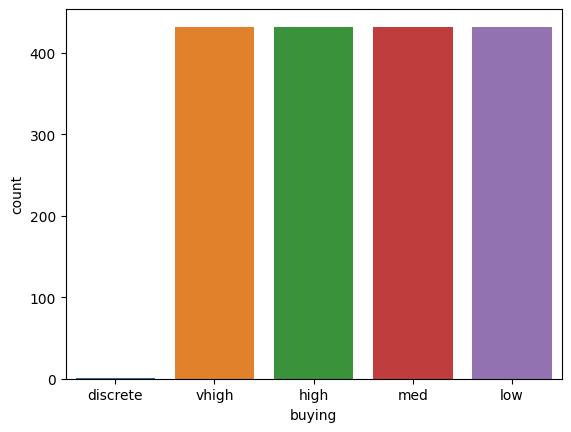

In [22]:
sns.countplot(x='buying', data=df)  # Візуалізація категоріальної змінної "buying"
plt.show()

In [27]:
df[df["buying"] == "vhigh"]  # Вибір рядків, де значення в стовпчику "buying" дорівнює "vhigh"


,buying,maint,persons,lug_boot,doors,safety,car
2,vhigh,vhigh,2,small,2,low,unacc
3,vhigh,vhigh,2,small,2,med,unacc
4,vhigh,vhigh,2,small,2,high,unacc
5,vhigh,vhigh,2,med,2,low,unacc
6,vhigh,vhigh,2,med,2,med,unacc
...,...,...,...,...,...,...,...
429,vhigh,low,more,med,5more,med,acc
430,vhigh,low,more,med,5more,high,acc
431,vhigh,low,more,big,5more,low,unacc
432,vhigh,low,more,big,5more,med,acc


In [29]:
condition = (df["buying"] == "vhigh") & (df["safety"] == "low") & (df["car"] == "unacc")
df[condition]  # Вибір рядків, які задовольняють усі умови


,buying,maint,persons,lug_boot,doors,safety,car
2,vhigh,vhigh,2,small,2,low,unacc
5,vhigh,vhigh,2,med,2,low,unacc
8,vhigh,vhigh,2,big,2,low,unacc
11,vhigh,vhigh,4,small,2,low,unacc
14,vhigh,vhigh,4,med,2,low,unacc
...,...,...,...,...,...,...,...
419,vhigh,low,4,med,5more,low,unacc
422,vhigh,low,4,big,5more,low,unacc
425,vhigh,low,more,small,5more,low,unacc
428,vhigh,low,more,med,5more,low,unacc


In [30]:
df.sort_values(by="buying", ascending=True)  # Сортування датафрейму за стовпчиком "buying" у зростаючому порядку


,buying,maint,persons,lug_boot,doors,safety,car
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete
571,high,high,2,small,3,high,unacc
572,high,high,2,med,3,low,unacc
573,high,high,2,med,3,med,unacc
574,high,high,2,med,3,high,unacc
...,...,...,...,...,...,...,...
138,vhigh,high,2,small,3,med,unacc
137,vhigh,high,2,small,3,low,unacc
148,vhigh,high,4,small,3,high,unacc
432,vhigh,low,more,big,5more,med,acc


In [32]:
df[(df["buying"] == "vhigh") | (df["buying"] == "high")]
# Вибір рядків, де значення в стовпчику "buying" дорівнює "vhigh" або "high"


,buying,maint,persons,lug_boot,doors,safety,car
2,vhigh,vhigh,2,small,2,low,unacc
3,vhigh,vhigh,2,small,2,med,unacc
4,vhigh,vhigh,2,small,2,high,unacc
5,vhigh,vhigh,2,med,2,low,unacc
6,vhigh,vhigh,2,med,2,med,unacc
...,...,...,...,...,...,...,...
861,high,low,more,med,5more,med,acc
862,high,low,more,med,5more,high,acc
863,high,low,more,big,5more,low,unacc
864,high,low,more,big,5more,med,acc


In [35]:
df.dropna(inplace=True) #видалення пустих значень


In [36]:
df[~df["lug_boot"].str.contains("big")]
# Вибір рядків, де стовпчик "lug_boot" не містить згадки про "big"


,buying,maint,persons,lug_boot,doors,safety,car
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete
2,vhigh,vhigh,2,small,2,low,unacc
3,vhigh,vhigh,2,small,2,med,unacc
4,vhigh,vhigh,2,small,2,high,unacc
5,vhigh,vhigh,2,med,2,low,unacc
...,...,...,...,...,...,...,...
1722,low,low,more,small,5more,med,acc
1723,low,low,more,small,5more,high,good
1724,low,low,more,med,5more,low,unacc
1725,low,low,more,med,5more,med,good


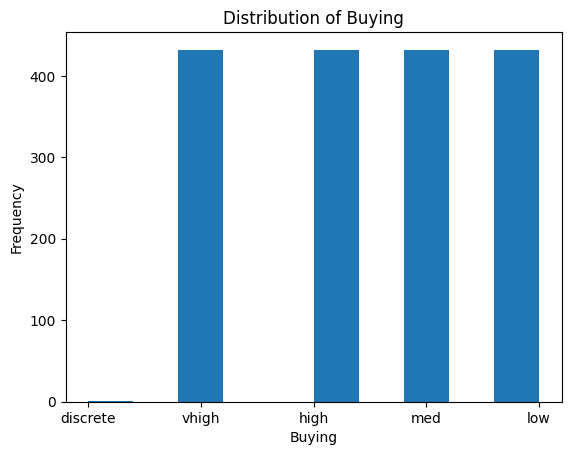

In [37]:
import matplotlib.pyplot as plt

plt.hist(df["buying"])
plt.xlabel("Buying")
plt.ylabel("Frequency")
plt.title("Distribution of Buying")
plt.show()
#Гістограма демонструє розподіл певної змінної (у цьому випадку "buying") на осі x
#і кількість випадків або частоту цієї змінної на осі y. 
#Вона дозволяє визначити, які значення варіюються найбільше і як вони розподілені.

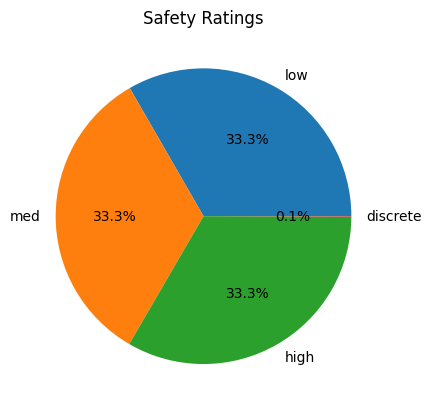

In [38]:
import matplotlib.pyplot as plt

counts = df["safety"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Safety Ratings")
plt.show()
# Кругова діаграма відображає пропорційний розподіл категорій (у цьому випадку "safety")
# у відсотках. Кожна категорія представлена сектором круга, розмір якого пропорційний відсотковому значенню цієї категорії.

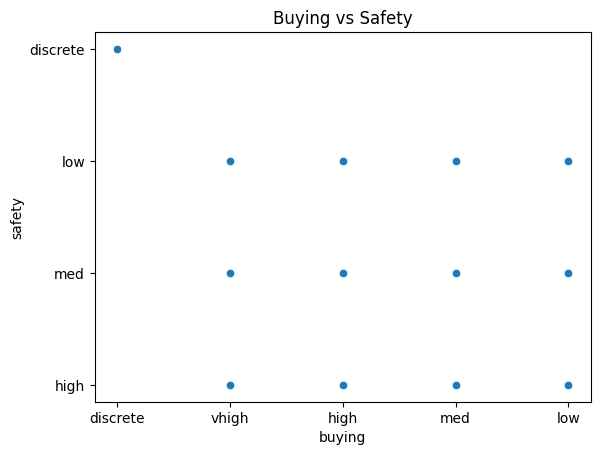

In [42]:
import seaborn as sns

sns.scatterplot(x="buying", y="safety", data=df)
plt.title("Buying vs Safety")
plt.show()
#Графік розсіювання відображає взаємозв'язок між двома змінними (у цьому випадку "buying" та "safety"). 
#Кожна точка на графіку представляє одне спостереження, 
#де позиція точки відповідає значенням цих двох змінних. 
#Цей графік допомагає виявити наявність або відсутність залежності між змінними.